# Devoir Python

Faire :
- EDA(Graphiques, values counts...)
- Preprocessing
- Feature Engineering

In [117]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from pandas.core.algorithms import value_counts_arraylike
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [3]:
main_path = "/Users/z/Desktop/cours_machinelearning"
cars_path = main_path + "/used_cars_data.csv"
print(cars_path)
df = pd.read_csv(cars_path, sep=",")

/Users/z/Desktop/cours_machinelearning/used_cars_data.csv


/var/folders/mc/g9__gqz90s7dx6wyrgy5rfbw0000gn/T/ipykernel_13690/2751648494.py:4: DtypeWarning: Columns (0: dealer_zip) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(cars_path, sep=",")


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 66 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   vin                      str    
 1   back_legroom             str    
 2   bed                      str    
 3   bed_height               str    
 4   bed_length               str    
 5   body_type                str    
 6   cabin                    str    
 7   city                     str    
 8   city_fuel_economy        float64
 9   combine_fuel_economy     float64
 10  daysonmarket             int64  
 11  dealer_zip               object 
 12  description              str    
 13  engine_cylinders         str    
 14  engine_displacement      float64
 15  engine_type              str    
 16  exterior_color           str    
 17  fleet                    object 
 18  frame_damaged            object 
 19  franchise_dealer         bool   
 20  franchise_make           str    
 21  front_legroom      

In [5]:
df.describe()

,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,is_certified,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,vehicle_damage_category,year
count,2.508755e+06,0.0,3.000040e+06,2.827654e+06,2.508755e+06,2.827654e+06,0.0,3.000040e+06,3.000040e+06,3.000040e+06,2.855653e+06,1.483027e+06,3.000040e+06,3.000040e+06,2.959168e+06,2.999944e+06,0.0,3.000040e+06
mean,2.269325e+01,NaN,7.605973e+01,2.968488e+03,2.947337e+01,2.479957e+02,NaN,3.698414e+01,2.754987e+08,-9.064224e+01,3.114690e+04,1.532644e+00,2.993337e+04,5.509768e+02,4.270413e+00,2.335224e+05,NaN,2.017728e+03
std,8.807024e+00,NaN,1.088839e+02,1.348905e+03,7.769252e+00,9.046639e+01,NaN,4.996819e+00,8.894123e+06,1.390589e+01,7.458675e+04,9.202928e-01,1.956617e+04,1.079448e+03,5.133017e-01,1.323221e+05,NaN,4.178701e+00
min,7.000000e+00,NaN,0.000000e+00,7.000000e+02,1.000000e+01,5.500000e+01,NaN,1.834670e+01,1.994620e+07,-1.579280e+02,0.000000e+00,1.000000e+00,1.650000e+02,0.000000e+00,1.000000e+00,4.159300e+04,NaN,1.915000e+03
25%,1.800000e+01,NaN,1.400000e+01,2.000000e+03,2.500000e+01,1.750000e+02,NaN,3.350920e+01,2.745794e+08,-9.708820e+01,6.000000e+00,1.000000e+00,1.845100e+04,0.000000e+00,4.000000e+00,6.337500e+04,NaN,2.017000e+03
50%,2.100000e+01,NaN,3.500000e+01,2.500000e+03,2.900000e+01,2.440000e+02,NaN,3.784710e+01,2.785453e+08,-8.724950e+01,8.267000e+03,1.000000e+00,2.647700e+04,0.000000e+00,4.341463e+00,2.816270e+05,NaN,2.020000e+03
75%,2.600000e+01,NaN,8.200000e+01,3.600000e+03,3.300000e+01,3.000000e+02,NaN,4.100620e+01,2.804553e+08,-8.045490e+01,4.366200e+04,2.000000e+00,3.822000e+04,7.850000e+02,4.605263e+00,3.366140e+05,NaN,2.020000e+03
max,1.270000e+02,NaN,3.599000e+03,8.400000e+03,1.270000e+02,1.001000e+03,NaN,6.120310e+01,2.820222e+08,-6.607850e+01,9.999999e+07,1.900000e+01,3.299995e+06,1.474140e+05,5.000000e+00,4.409510e+05,NaN,2.021000e+03


In [6]:
df.head()

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,...,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


# FILTRES POUR HOMOGENEISER ET FIABILISER LES DONNEES

In [7]:
df = df[df["bed"].isna()]
df = df[df["cabin"].isna()]
df = df[df["frame_damaged"] != True]
df = df[df["has_accidents"] != True]
df = df[df["isCab"] != True]
df = df[~df["main_picture_url"].isna()]
df = df[(df["owner_count"].isna()) | (df["owner_count"] == 1)]
df = df[df["salvage"] != True]
df = df[df["theft_title"] != True]
df = df[df["daysonmarket"] < 365]

In [8]:
df = df.drop(["bed", "bed_height", "cabin", "city", "dealer_zip",
              "description", "exterior_color", "has_accidents", "interior_color",
              "isCab", "frame_damaged", "latitude", "longitude", "main_picture_url", "owner_count",
              "is_certified", "is_cpo", "salvage", "savings_amount", "seller_rating", "sp_id", "theft_title",
              "vehicle_damage_category"], axis=1)

# Supprimer 50% du dadtaframe pour accélérer le read les prochaines fois sur read_csv

In [11]:

df = df.iloc[:len(df)//2]

(453582, 43)

In [12]:
csv_path = main_path + "/used_cars_data_shorter.csv"
df.to_csv(csv_path, index=False)

# Désormais on va travailler sur _used_cars_data_shorter.csv

In [22]:
main_path = "/Users/z/Desktop/cours_machinelearning"
cars_path = main_path + "/used_cars_data.csv"
csv_path = main_path + "/used_cars_data_shorter.csv"
df2=pd.read_csv(csv_path, sep=",")
df2

,vin,back_legroom,bed_length,body_type,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,engine_type,...,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
0,SALCJ2FX1LH858117,38.1 in,NaN,SUV / Crossover,NaN,NaN,207,I4,2000.0,I4,...,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
1,SALRR2RV0L2433391,37.6 in,NaN,SUV / Crossover,NaN,NaN,196,V6,3000.0,V6,...,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,AWD,All-Wheel Drive,115 in,87.4 in,2020
2,SALCJ2FXXLH862327,38.1 in,NaN,SUV / Crossover,NaN,NaN,137,I4,2000.0,I4,...,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
3,SALYK2EX1LA261711,37.1 in,NaN,SUV / Crossover,NaN,NaN,242,I4,2000.0,I4,...,"269 lb-ft @ 1,200 RPM",A,8-Speed Automatic Overdrive,t85614,P250 R-Dynamic S AWD,AWD,All-Wheel Drive,113.1 in,84.4 in,2020
4,SALYK2EX5LA275434,37.1 in,NaN,SUV / Crossover,NaN,NaN,70,I4,2000.0,I4,...,"269 lb-ft @ 1,200 RPM",A,8-Speed Automatic Overdrive,t85614,P250 R-Dynamic S AWD,AWD,All-Wheel Drive,113.1 in,84.4 in,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453577,1C4PJMBX7LD631404,40.3 in,NaN,SUV / Crossover,18.0,NaN,69,V6,3200.0,V6,...,"295 lb-ft @ 3,000 RPM",A,9-Speed Automatic,t87067,Trailhawk 4WD,4WD,Four-Wheel Drive,107.1 in,74.9 in,2020
453578,3GTU9BED9LG332212,43.4 in,69.9 in,Pickup Truck,NaN,NaN,95,V8,5300.0,V8,...,"383 lb-ft @ 4,100 RPM",A,Automatic,t86396,SLE Crew Cab 4WD,4WD,Four-Wheel Drive,147.4 in,81.2 in,2020
453579,3FA6P0HD9LR159459,38.3 in,NaN,Sedan,23.0,NaN,208,I4,2500.0,I4,...,"185 lb-ft @ 4,320 RPM",A,6-Speed Automatic,t86414,SE FWD,FWD,Front-Wheel Drive,112.2 in,83.5 in,2020
453580,5TFAY5F11HX663722,42.3 in,66.7 in,Pickup Truck,NaN,NaN,38,V8,5700.0,V8,...,"401 lb-ft @ 3,600 RPM",A,6-Speed Automatic Overdrive,t68262,Platinum CrewMax 5.7L 4WD,4WD,Four-Wheel Drive,145.7 in,79.9 in,2017


In [23]:
df2.describe()

,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,listing_id,mileage,price,year
count,384706.000000,0.0,453582.000000,430238.000000,384706.000000,430238.000000,4.535820e+05,430459.000000,4.535820e+05,453582.000000
mean,23.052276,NaN,76.600820,2739.814940,29.588143,240.673590,2.754595e+08,16315.726620,3.271268e+04,2018.710108
std,8.482304,NaN,86.919163,1194.332002,7.334616,86.837822,6.702383e+06,28534.647535,1.909087e+04,3.045093
min,8.000000,NaN,0.000000,700.000000,11.000000,70.000000,2.518374e+08,0.000000,2.990000e+02,1915.000000
25%,18.000000,NaN,17.000000,2000.000000,25.000000,173.000000,2.736478e+08,4.000000,2.198800e+04,2017.000000
50%,22.000000,NaN,40.000000,2500.000000,29.000000,228.000000,2.780877e+08,14.000000,2.900000e+04,2020.000000
75%,26.000000,NaN,92.000000,3500.000000,33.000000,295.000000,2.801432e+08,26274.500000,3.997000e+04,2020.000000
max,127.000000,NaN,364.000000,8400.000000,127.000000,808.000000,2.817340e+08,785778.000000,2.698500e+06,2021.000000


## Création ensemble train-test

In [20]:
SEED=32
df_train, df_test= train_test_split(df2, test_size=0.2, random_state=SEED)

In [23]:
df_train

,vin,back_legroom,bed_length,body_type,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,engine_type,...,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
323922,JTMN1RFV0LD529178,37.8 in,NaN,SUV / Crossover,25.0,NaN,155,I4,2500.0,I4,...,NaN,A,8-Speed Automatic,t89229,Limited AWD,AWD,All-Wheel Drive,105.9 in,73 in,2020
157760,JF2SKADC6LH609842,39.4 in,NaN,SUV / Crossover,26.0,NaN,5,H4,2500.0,H4,...,"176 lb-ft @ 4,400 RPM",CVT,Continuously Variable Transmission,t87111,2.5i AWD,AWD,All-Wheel Drive,105.1 in,80.9 in,2020
310083,1G1ZD5ST7LF143280,38.1 in,NaN,Sedan,29.0,NaN,25,I4,1500.0,I4,...,"184 lb-ft @ 2,500 RPM",A,Automatic,t85496,LT FWD,FWD,Front-Wheel Drive,111.4 in,73 in,2020
356377,2GKALNEK9H6293018,39.9 in,NaN,SUV / Crossover,21.0,NaN,41,I4,2400.0,I4,...,"272 lb-ft @ 4,800 RPM",A,6-Speed Automatic,t67439,SLE2,FWD,Front-Wheel Drive,112.5 in,72.8 in,2017
343668,1C3CCBBG9DN744770,36.2 in,NaN,Sedan,19.0,NaN,14,V6 Flex Fuel Vehicle,3600.0,V6 Flex Fuel Vehicle,...,"260 lb-ft @ 4,400 RPM",A,Automatic,t44321,Touring Sedan FWD,FWD,Front-Wheel Drive,108.9 in,72.5 in,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322428,2T3P1RFV7LW120901,37.8 in,NaN,SUV / Crossover,25.0,NaN,70,I4,2500.0,I4,...,NaN,A,8-Speed Automatic,t89231,XLE AWD,AWD,All-Wheel Drive,105.9 in,73 in,2020
75062,1FTEW1EP4LFC62038,43.6 in,67.1 in,Pickup Truck,18.0,NaN,19,V6,3500.0,V6,...,"400 lb-ft @ 4,500 RPM",A,Automatic,t87733,XL SuperCrew 4WD,4WD,Four-Wheel Drive,145 in,96.8 in,2020
130949,1GCPYBEHXLZ357753,43.4 in,69.9 in,Pickup Truck,NaN,NaN,14,V6 Flex Fuel Vehicle,4300.0,V6 Flex Fuel Vehicle,...,"383 lb-ft @ 4,100 RPM",A,6-Speed Automatic,t86480,Custom Crew Cab 4WD,4WD,Four-Wheel Drive,147.4 in,81.2 in,2020
370219,1N4AA6AP7HC429846,34.2 in,NaN,Sedan,21.0,NaN,30,V6,3500.0,V6,...,"261 lb-ft @ 4,400 RPM",CVT,Continuously Variable Transmission,t68136,SL FWD,FWD,Front-Wheel Drive,109.3 in,73.2 in,2017


# 1- EDA

# Dictionnaire des variables

In [24]:
df_train.info()

<class 'pandas.DataFrame'>
Index: 362865 entries, 323922 to 10967
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   362865 non-null  str    
 1   back_legroom          346362 non-null  str    
 2   bed_length            39545 non-null   str    
 3   body_type             361155 non-null  str    
 4   city_fuel_economy     307739 non-null  float64
 5   combine_fuel_economy  0 non-null       float64
 6   daysonmarket          362865 non-null  int64  
 7   engine_cylinders      353048 non-null  str    
 8   engine_displacement   344174 non-null  float64
 9   engine_type           353048 non-null  str    
 10  fleet                 151029 non-null  object 
 11  franchise_dealer      362865 non-null  bool   
 12  franchise_make        329276 non-null  str    
 13  front_legroom         346362 non-null  str    
 14  fuel_tank_volume      346362 non-null  str    
 15  fuel_type   

# Description des données

In [25]:
df_train.head()

,vin,back_legroom,bed_length,body_type,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,engine_type,...,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
323922,JTMN1RFV0LD529178,37.8 in,NaN,SUV / Crossover,25.0,NaN,155,I4,2500.0,I4,...,NaN,A,8-Speed Automatic,t89229,Limited AWD,AWD,All-Wheel Drive,105.9 in,73 in,2020
157760,JF2SKADC6LH609842,39.4 in,NaN,SUV / Crossover,26.0,NaN,5,H4,2500.0,H4,...,"176 lb-ft @ 4,400 RPM",CVT,Continuously Variable Transmission,t87111,2.5i AWD,AWD,All-Wheel Drive,105.1 in,80.9 in,2020
310083,1G1ZD5ST7LF143280,38.1 in,NaN,Sedan,29.0,NaN,25,I4,1500.0,I4,...,"184 lb-ft @ 2,500 RPM",A,Automatic,t85496,LT FWD,FWD,Front-Wheel Drive,111.4 in,73 in,2020
356377,2GKALNEK9H6293018,39.9 in,NaN,SUV / Crossover,21.0,NaN,41,I4,2400.0,I4,...,"272 lb-ft @ 4,800 RPM",A,6-Speed Automatic,t67439,SLE2,FWD,Front-Wheel Drive,112.5 in,72.8 in,2017
343668,1C3CCBBG9DN744770,36.2 in,NaN,Sedan,19.0,NaN,14,V6 Flex Fuel Vehicle,3600.0,V6 Flex Fuel Vehicle,...,"260 lb-ft @ 4,400 RPM",A,Automatic,t44321,Touring Sedan FWD,FWD,Front-Wheel Drive,108.9 in,72.5 in,2013


In [26]:
df_train.info()

<class 'pandas.DataFrame'>
Index: 362865 entries, 323922 to 10967
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   362865 non-null  str    
 1   back_legroom          346362 non-null  str    
 2   bed_length            39545 non-null   str    
 3   body_type             361155 non-null  str    
 4   city_fuel_economy     307739 non-null  float64
 5   combine_fuel_economy  0 non-null       float64
 6   daysonmarket          362865 non-null  int64  
 7   engine_cylinders      353048 non-null  str    
 8   engine_displacement   344174 non-null  float64
 9   engine_type           353048 non-null  str    
 10  fleet                 151029 non-null  object 
 11  franchise_dealer      362865 non-null  bool   
 12  franchise_make        329276 non-null  str    
 13  front_legroom         346362 non-null  str    
 14  fuel_tank_volume      346362 non-null  str    
 15  fuel_type   

## Valeur manquante :
- `back_legroom`
- `bed_length`: la majorité des valeurs de cette variables sont manquantes, elle n'est donc pas exploitable et devra être supprimée ;
- `body_type`: très peu de valeurs manquantes, on pourra  imputer les valeurs manquantes.
- `city_fuel_economy` : très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `combine_fuel_economy` : la majorité des valeurs de cette variables sont manquantes, elle n'est donc pas exploitable et devra être supprimée ;
- `engine_cylinders` : très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `engine_displacement` : très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `engine_type` : très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `fleet` : la majorité des valeurs de cette variables sont manquantes, elle n'est donc pas exploitable et devra être supprimée ;
- `franchise_make` : très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `front_legroom`: très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `fuel_tank_volume`: très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `fuel_type`: très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `height`: très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `highway_fuel_economy`: très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `horsepower`: très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `is_oemcpo`: la majorité des valeurs de cette variables sont manquantes, elle n'est donc pas exploitable et devra être supprimée ;
- `length`: très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `major_options`: très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `maximum_seating`: très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `mileage`: très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `power`: très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `torque`: très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `transmission`: très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `transmission_display`: très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `trimId`: très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `trim_name`: très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `wheel_system`: très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `wheel_system_display`: très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `wheelbase`: très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.
- `width`: très peu de valeurs manquantes, on pourra également imputer les valeurs manquantes.

# Type des variables
- **Variables catégorielles** : body_type; engine_cylinders; engine_type; fleet; franchise_dealer; franchise_make; fuel_type; is_new; listing_color; make_name; maximum_seating; model_name; sp_name; transmission; transmission_display; trim_name; wheel_system; wheel_system_display;
- **Variables numériques** : city_fuel_economy; daysonmarket; engine_displacement; highway_fuel_economy; horsepower; listing_id; mileage; price; year
- **Variables mixes** : back_legroom; bed_length; front_legroon; fuel_tank_volume; heigth; length; maximum seating; power; torque; trimId, wheelbase;
- **Variables textuelles** : vin; listed_date; major_option; sp_name

# Statistiques univariées

In [28]:
num_var=["city_fuel_economy", "combine_fuel_economy", "daysonmarket", "engine_displacement", "highway_fuel_economy","horsepower", "listing_id", "mileage", "price", "year"]
df_train[num_var].describe()

,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,listing_id,mileage,price,year
count,307739.000000,0.0,362865.000000,344174.000000,307739.000000,344174.000000,3.628650e+05,344294.000000,3.628650e+05,362865.000000
mean,23.053363,NaN,76.634713,2739.849030,29.588044,240.661261,2.754570e+08,16362.735363,3.269923e+04,2018.706097
std,8.538606,NaN,86.960404,1194.401949,7.363909,86.845076,6.705470e+06,28607.306748,1.879020e+04,3.071453
min,8.000000,NaN,0.000000,700.000000,11.000000,70.000000,2.518374e+08,0.000000,2.990000e+02,1915.000000
25%,18.000000,NaN,17.000000,2000.000000,25.000000,174.000000,2.736457e+08,4.000000,2.198800e+04,2017.000000
50%,22.000000,NaN,40.000000,2500.000000,29.000000,228.000000,2.780896e+08,14.000000,2.899900e+04,2020.000000
75%,26.000000,NaN,92.000000,3500.000000,33.000000,295.000000,2.801429e+08,26337.000000,3.996900e+04,2020.000000
max,127.000000,NaN,364.000000,8400.000000,127.000000,808.000000,2.817340e+08,785778.000000,2.698500e+06,2021.000000


<Axes: >

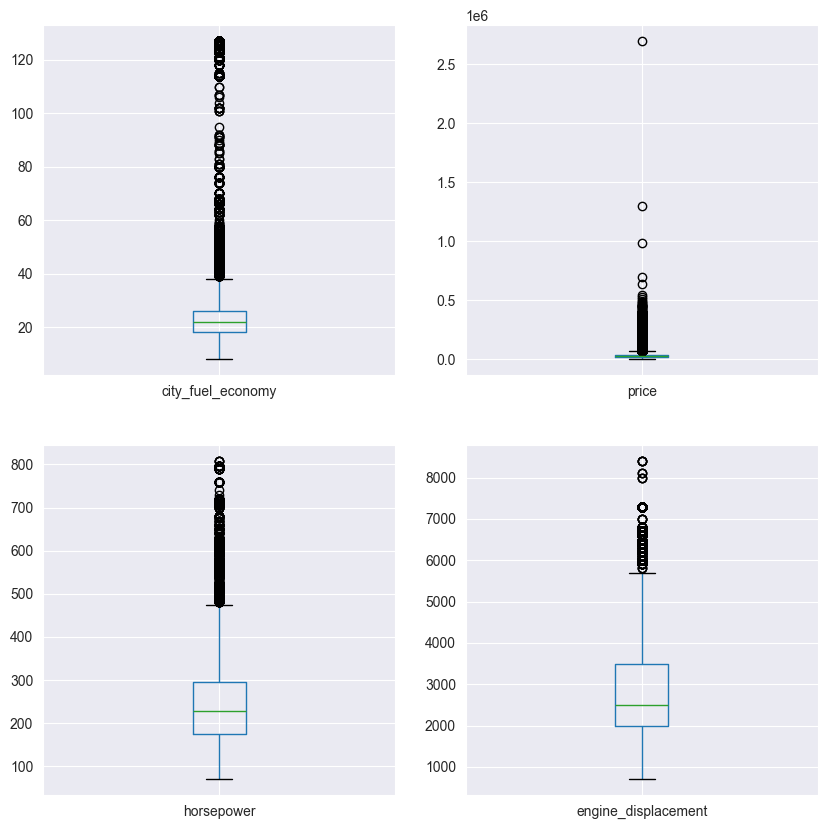

In [33]:
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(10,10))

df_train.boxplot(column="city_fuel_economy", ax=axes[0][0])
df_train.boxplot(column="price", ax=axes[0][1])
df_train.boxplot(column="horsepower", ax=axes[1][0])
df_train.boxplot(column="engine_displacement", ax=axes[1][1])

Les boxplots permettent de mettre en lumière d'éventuels *outliers*, selon la règle de l'écart-interquartile.

- On peut remarquer qu'il y'a des outlyers par exemple pour les 4 variables qu'on a considéré, il faudrait soit utiliser des transformations logarithmique soit gérer avec d'autres méthodes ces outlyers.

# Variables catégorielles

<Axes: xlabel='engine_cylinders'>

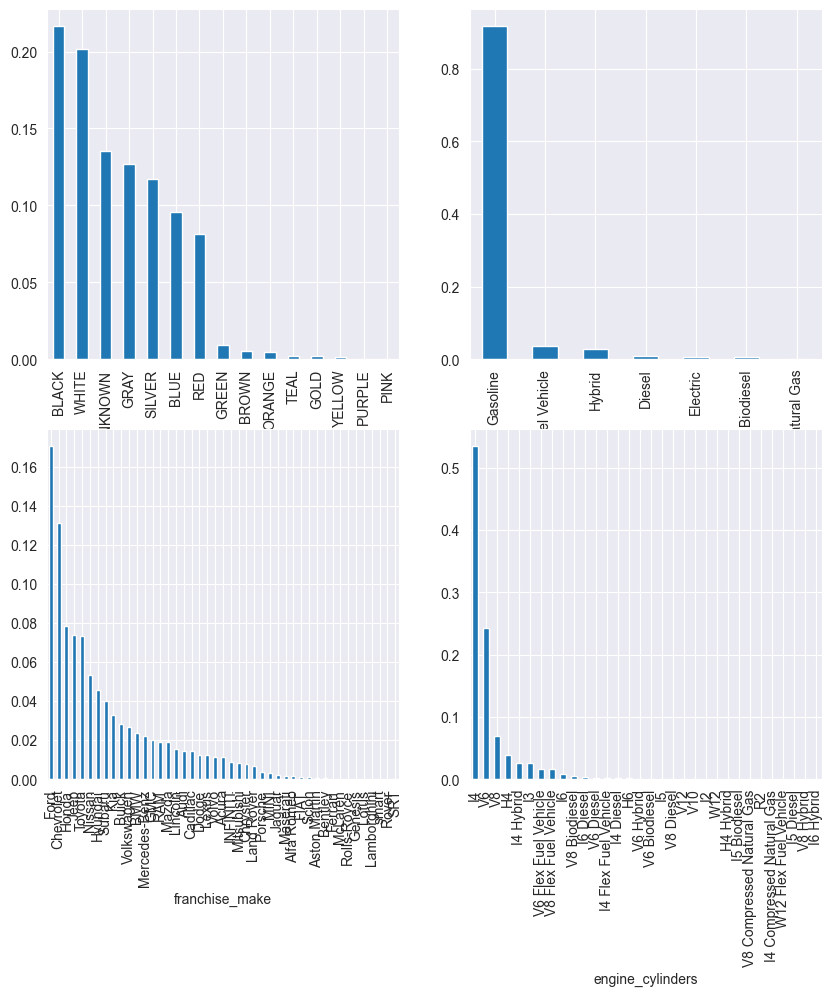

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

df_train['listing_color'].value_counts(normalize=True).plot(kind='bar', ax=axes[0][0])
df_train['fuel_type'].value_counts(normalize=True).plot(kind='bar', ax=axes[0][1])
df_train['franchise_make'].value_counts(normalize=True).plot(kind='bar', ax=axes[1][0])
df_train['engine_cylinders'].value_counts(normalize=True).plot(kind='bar', ax=axes[1][1])

Matrice des corrélations

In [42]:
df_train[num_var].corr()

,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,listing_id,mileage,price,year
city_fuel_economy,1.000000,NaN,0.032956,-0.621879,0.941707,-0.651698,-0.032053,-0.097250,-0.214575,0.094146
combine_fuel_economy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
daysonmarket,0.032956,NaN,1.000000,-0.081467,0.018399,-0.033935,-0.998143,-0.212955,0.099318,0.134189
engine_displacement,-0.621879,NaN,-0.081467,1.000000,-0.642674,0.811777,0.081701,0.097579,0.409963,-0.089081
highway_fuel_economy,0.941707,NaN,0.018399,-0.642674,1.000000,-0.681643,-0.017476,-0.072627,-0.289243,0.063968
horsepower,-0.651698,NaN,-0.033935,0.811777,-0.681643,1.000000,0.033589,-0.007953,0.651036,0.018335
listing_id,-0.032053,NaN,-0.998143,0.081701,-0.017476,0.033589,1.000000,0.210626,-0.097960,-0.132041
mileage,-0.097250,NaN,-0.212955,0.097579,-0.072627,-0.007953,0.210626,1.000000,-0.354046,-0.669654
price,-0.214575,NaN,0.099318,0.409963,-0.289243,0.651036,-0.097960,-0.354046,1.000000,0.243420
year,0.094146,NaN,0.134189,-0.089081,0.063968,0.018335,-0.132041,-0.669654,0.243420,1.000000


<Axes: >

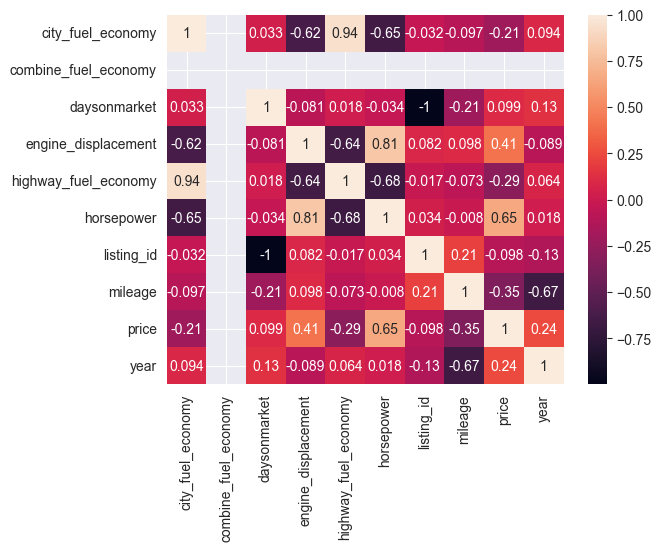

In [45]:
sns.heatmap(df_train[num_var].corr(), annot=True)

La matrice des corrélations permet d'estimer les corrélations entre les variables de type numérique. On retrouve un certain nombre de constats faits précédemment. Par ailleurs, on n'observe une forte corrélation entre city_fuel_economy et higway_fuel_economy, city_fuel_economy et year, engine_displacement et horsepower, daysonmarket et listing_id on ne gardera que les meilleurs variables pour expliquer le prix.


# Préparation des données

## Suppression des variables non-pertinentes (pour expliquer le prix)



On peut d'ores et déjà **supprimer un ensemble de variables non-pertinentes pour notre application**.

- `vin, listing_id` : cette variable est simplement un identifiant individuel, elle n'est pas utile pour l'entraînement du modèle ;
- `bed_length, combine_fuel_economy, is_oemcpo` : la majorité des valeurs de ces variables sont manquantes, elles ne sont donc pas exploitable.

In [46]:
cols_to_drop1=['vin', 'listing_id', 'bed_length', 'combine_fuel_economy', 'is_oemcpo']
df_train2=df_train.drop(columns=cols_to_drop1)

In [47]:
df_train2.columns

Index(['back_legroom', 'body_type', 'city_fuel_economy', 'daysonmarket',
       'engine_cylinders', 'engine_displacement', 'engine_type', 'fleet',
       'franchise_dealer', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'height', 'highway_fuel_economy',
       'horsepower', 'is_new', 'length', 'listed_date', 'listing_color',
       'major_options', 'make_name', 'maximum_seating', 'mileage',
       'model_name', 'power', 'price', 'sp_name', 'torque', 'transmission',
       'transmission_display', 'trimId', 'trim_name', 'wheel_system',
       'wheel_system_display', 'wheelbase', 'width', 'year'],
      dtype='str')

In [57]:
df_train2

,back_legroom,body_type,city_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,engine_type,fleet,franchise_dealer,franchise_make,...,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
323922,37.8 in,SUV / Crossover,25.0,155,I4,2500.0,I4,NaN,True,Toyota,...,NaN,A,8-Speed Automatic,t89229,Limited AWD,AWD,All-Wheel Drive,105.9 in,73 in,2020
157760,39.4 in,SUV / Crossover,26.0,5,H4,2500.0,H4,NaN,True,Subaru,...,"176 lb-ft @ 4,400 RPM",CVT,Continuously Variable Transmission,t87111,2.5i AWD,AWD,All-Wheel Drive,105.1 in,80.9 in,2020
310083,38.1 in,Sedan,29.0,25,I4,1500.0,I4,NaN,True,Chevrolet,...,"184 lb-ft @ 2,500 RPM",A,Automatic,t85496,LT FWD,FWD,Front-Wheel Drive,111.4 in,73 in,2020
356377,39.9 in,SUV / Crossover,21.0,41,I4,2400.0,I4,False,True,GMC,...,"272 lb-ft @ 4,800 RPM",A,6-Speed Automatic,t67439,SLE2,FWD,Front-Wheel Drive,112.5 in,72.8 in,2017
343668,36.2 in,Sedan,19.0,14,V6 Flex Fuel Vehicle,3600.0,V6 Flex Fuel Vehicle,False,True,Ford,...,"260 lb-ft @ 4,400 RPM",A,Automatic,t44321,Touring Sedan FWD,FWD,Front-Wheel Drive,108.9 in,72.5 in,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322428,37.8 in,SUV / Crossover,25.0,70,I4,2500.0,I4,NaN,True,Toyota,...,NaN,A,8-Speed Automatic,t89231,XLE AWD,AWD,All-Wheel Drive,105.9 in,73 in,2020
75062,43.6 in,Pickup Truck,18.0,19,V6,3500.0,V6,NaN,True,Ford,...,"400 lb-ft @ 4,500 RPM",A,Automatic,t87733,XL SuperCrew 4WD,4WD,Four-Wheel Drive,145 in,96.8 in,2020
130949,43.4 in,Pickup Truck,NaN,14,V6 Flex Fuel Vehicle,4300.0,V6 Flex Fuel Vehicle,NaN,True,Chevrolet,...,"383 lb-ft @ 4,100 RPM",A,6-Speed Automatic,t86480,Custom Crew Cab 4WD,4WD,Four-Wheel Drive,147.4 in,81.2 in,2020
370219,34.2 in,Sedan,21.0,30,V6,3500.0,V6,False,True,Acura,...,"261 lb-ft @ 4,400 RPM",CVT,Continuously Variable Transmission,t68136,SL FWD,FWD,Front-Wheel Drive,109.3 in,73.2 in,2017


- wheel_system et wheel_systeme_display apprte exactement la meme information, on supprime donc une colonne
-

In [58]:
cols_to_drop2=['wheel_system_display']
df_train2=df_train2.drop(columns=cols_to_drop2)

Éliminons avec les corrélations désormais :

<class 'pandas.DataFrame'>
Index: 362865 entries, 323922 to 10967
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   back_legroom          346362 non-null  str    
 1   body_type             361155 non-null  str    
 2   city_fuel_economy     307739 non-null  float64
 3   daysonmarket          362865 non-null  int64  
 4   engine_cylinders      353048 non-null  str    
 5   engine_displacement   344174 non-null  float64
 6   engine_type           353048 non-null  str    
 7   fleet                 151029 non-null  object 
 8   franchise_dealer      362865 non-null  bool   
 9   franchise_make        329276 non-null  str    
 10  front_legroom         346362 non-null  str    
 11  fuel_tank_volume      346362 non-null  str    
 12  fuel_type             355328 non-null  str    
 13  height                346362 non-null  str    
 14  highway_fuel_economy  307739 non-null  float64
 15  horsepower  

<Axes: >

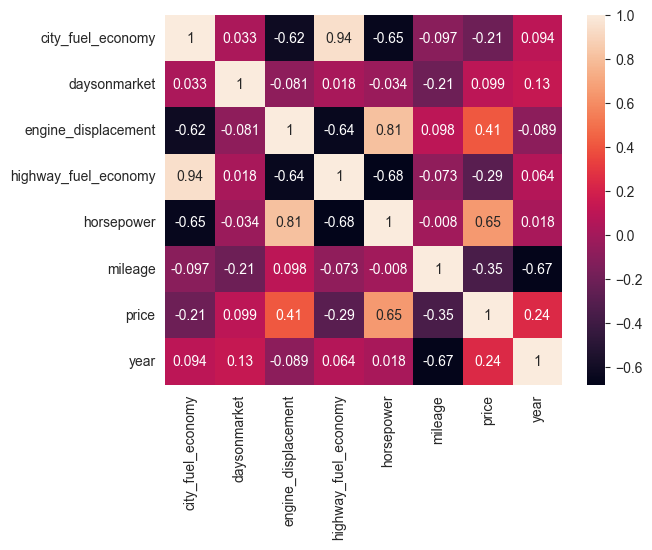

In [63]:
df_train2.info()
num_var2=['city_fuel_economy','daysonmarket','engine_displacement','highway_fuel_economy','horsepower','mileage','price','year']
df_train2[num_var2].corr()
sns.heatmap(df_train2[num_var2].corr(), annot=True)

# On veut expliquer price : on regarde les corrélations 2 a 2, si 2 variables sont très corrélé entre elles on garde celle qui est le plus corrélé a Y (donc price)
- city_fuel_economy: très corrélé a highway_fuel, mileage et year
- engine_displacement très corrélé a horsepower->on supprime engine_displacement qui explique moins bien le price
- highway_fuel très corrélé a city_fuel_economy-> on supprime city_fuel

In [64]:
cols_to_drop3=['engine_displacement','city_fuel_economy']
df_train3=df_train2.drop(columns=cols_to_drop3)

<class 'pandas.DataFrame'>
Index: 362865 entries, 323922 to 10967
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   back_legroom          346362 non-null  str    
 1   body_type             361155 non-null  str    
 2   daysonmarket          362865 non-null  int64  
 3   engine_cylinders      353048 non-null  str    
 4   engine_type           353048 non-null  str    
 5   fleet                 151029 non-null  object 
 6   franchise_dealer      362865 non-null  bool   
 7   franchise_make        329276 non-null  str    
 8   front_legroom         346362 non-null  str    
 9   fuel_tank_volume      346362 non-null  str    
 10  fuel_type             355328 non-null  str    
 11  height                346362 non-null  str    
 12  highway_fuel_economy  307739 non-null  float64
 13  horsepower            344174 non-null  float64
 14  is_new                362865 non-null  bool   
 15  length      

<Axes: >

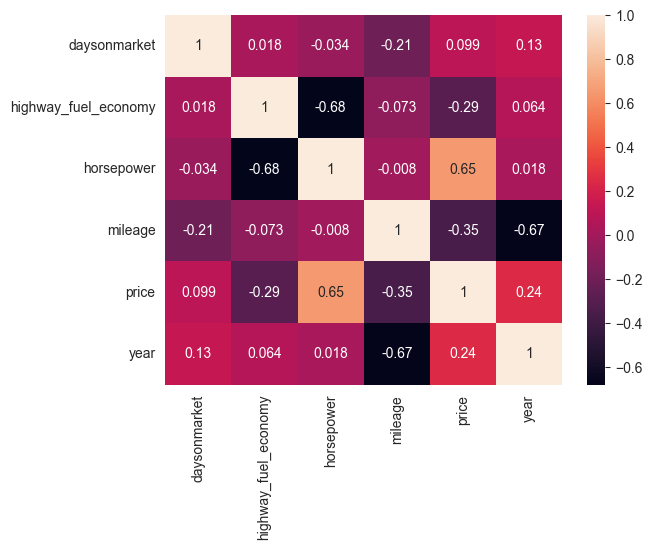

In [66]:
df_train3.info()
num_var3=['daysonmarket','highway_fuel_economy','horsepower','mileage','price','year']
df_train3[num_var3].corr()
sns.heatmap(df_train2[num_var3].corr(), annot=True)

In [71]:
df_train4=df_train3.drop(columns=['torque','engine_cylinders'])
df_train4

,back_legroom,body_type,daysonmarket,engine_type,fleet,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,...,price,sp_name,transmission,transmission_display,trimId,trim_name,wheel_system,wheelbase,width,year
323922,37.8 in,SUV / Crossover,155,I4,NaN,True,Toyota,41 in,14.5 gal,Gasoline,...,38868.0,Romeoville Toyota,A,8-Speed Automatic,t89229,Limited AWD,AWD,105.9 in,73 in,2020
157760,39.4 in,SUV / Crossover,5,H4,NaN,True,Subaru,43.3 in,16.6 gal,Gasoline,...,24215.0,Twin City Subaru,CVT,Continuously Variable Transmission,t87111,2.5i AWD,AWD,105.1 in,80.9 in,2020
310083,38.1 in,Sedan,25,I4,NaN,True,Chevrolet,41.5 in,15.8 gal,Gasoline,...,31155.0,Rentschler Chevrolet,A,Automatic,t85496,LT FWD,FWD,111.4 in,73 in,2020
356377,39.9 in,SUV / Crossover,41,I4,False,True,GMC,41.2 in,18.8 gal,Gasoline,...,15973.0,Zeigler Buick Cadillac GMC of Lincolnwood,A,6-Speed Automatic,t67439,SLE2,FWD,112.5 in,72.8 in,2017
343668,36.2 in,Sedan,14,V6 Flex Fuel Vehicle,False,True,Ford,42.4 in,16.9 gal,Flex Fuel Vehicle,...,6979.0,Ron Tirapelli Ford,A,Automatic,t44321,Touring Sedan FWD,FWD,108.9 in,72.5 in,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322428,37.8 in,SUV / Crossover,70,I4,NaN,True,Toyota,41 in,14.5 gal,Gasoline,...,32808.0,Romeoville Toyota,A,8-Speed Automatic,t89231,XLE AWD,AWD,105.9 in,73 in,2020
75062,43.6 in,Pickup Truck,19,V6,NaN,True,Ford,43.9 in,26 gal,Gasoline,...,46275.0,AutoFair Ford,A,Automatic,t87733,XL SuperCrew 4WD,4WD,145 in,96.8 in,2020
130949,43.4 in,Pickup Truck,14,V6 Flex Fuel Vehicle,NaN,True,Chevrolet,44.5 in,24 gal,Flex Fuel Vehicle,...,38534.0,Mike Savoie Chevrolet,A,6-Speed Automatic,t86480,Custom Crew Cab 4WD,4WD,147.4 in,81.2 in,2020
370219,34.2 in,Sedan,30,V6,False,True,Acura,45 in,18 gal,Gasoline,...,23995.0,McGrath Acura of Westmont,CVT,Continuously Variable Transmission,t68136,SL FWD,FWD,109.3 in,73.2 in,2017


In [82]:
df_train4=df_train4.drop(columns=['trimId','transmission_display','power','fleet','major_options','listed_date','franchise_make'])

KeyError: "['trimId', 'transmission_display', 'power', 'fleet'] not found in axis"

In [85]:
df_train4=df_train4.drop(columns=['major_options','listed_date','franchise_make'])

KeyError: "['major_options', 'listed_date', 'franchise_make'] not found in axis"

In [87]:
df_train4=df_train4.drop(columns=['sp_name','trim_name','listing_color'])
df_train4.info()

<class 'pandas.DataFrame'>
Index: 362865 entries, 323922 to 10967
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   back_legroom          346362 non-null  str    
 1   body_type             361155 non-null  str    
 2   daysonmarket          362865 non-null  int64  
 3   engine_type           353048 non-null  str    
 4   franchise_dealer      362865 non-null  bool   
 5   front_legroom         346362 non-null  str    
 6   fuel_tank_volume      346362 non-null  str    
 7   fuel_type             355328 non-null  str    
 8   height                346362 non-null  str    
 9   highway_fuel_economy  307739 non-null  float64
 10  horsepower            344174 non-null  float64
 11  is_new                362865 non-null  bool   
 12  length                346362 non-null  str    
 13  make_name             362865 non-null  str    
 14  maximum_seating       346362 non-null  str    
 15  mileage     

On a donc supprimé toutes les colonnes qui n'étais pas utile pour prédire le price.

In [89]:
df_train_prepro=df_train4
df_train_prepro

,back_legroom,body_type,daysonmarket,engine_type,franchise_dealer,front_legroom,fuel_tank_volume,fuel_type,height,highway_fuel_economy,...,make_name,maximum_seating,mileage,model_name,price,transmission,wheel_system,wheelbase,width,year
323922,37.8 in,SUV / Crossover,155,I4,True,41 in,14.5 gal,Gasoline,67.2 in,33.0,...,Toyota,5 seats,2.0,RAV4,38868.0,A,AWD,105.9 in,73 in,2020
157760,39.4 in,SUV / Crossover,5,H4,True,43.3 in,16.6 gal,Gasoline,67.5 in,33.0,...,Subaru,5 seats,1.0,Forester,24215.0,CVT,AWD,105.1 in,80.9 in,2020
310083,38.1 in,Sedan,25,I4,True,41.5 in,15.8 gal,Gasoline,57.9 in,36.0,...,Chevrolet,5 seats,1.0,Malibu,31155.0,A,FWD,111.4 in,73 in,2020
356377,39.9 in,SUV / Crossover,41,I4,True,41.2 in,18.8 gal,Gasoline,66.3 in,31.0,...,GMC,5 seats,55204.0,Terrain,15973.0,A,FWD,112.5 in,72.8 in,2017
343668,36.2 in,Sedan,14,V6 Flex Fuel Vehicle,True,42.4 in,16.9 gal,Flex Fuel Vehicle,58.4 in,29.0,...,Chrysler,5 seats,109506.0,200,6979.0,A,FWD,108.9 in,72.5 in,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322428,37.8 in,SUV / Crossover,70,I4,True,41 in,14.5 gal,Gasoline,67 in,33.0,...,Toyota,5 seats,1.0,RAV4,32808.0,A,AWD,105.9 in,73 in,2020
75062,43.6 in,Pickup Truck,19,V6,True,43.9 in,26 gal,Gasoline,77.2 in,23.0,...,Ford,6 seats,NaN,F-150,46275.0,A,4WD,145 in,96.8 in,2020
130949,43.4 in,Pickup Truck,14,V6 Flex Fuel Vehicle,True,44.5 in,24 gal,Flex Fuel Vehicle,75.5 in,NaN,...,Chevrolet,6 seats,0.0,Silverado 1500,38534.0,A,4WD,147.4 in,81.2 in,2020
370219,34.2 in,Sedan,30,V6,True,45 in,18 gal,Gasoline,56.5 in,30.0,...,Nissan,5 seats,32185.0,Maxima,23995.0,CVT,FWD,109.3 in,73.2 in,2017


# Traitement des valeurs manquantes

Cette fois, on va éviter au maximum la perte de données d'entraînement en **imputant les valeurs manquantes** :
- pour les variables numériques, on impute la **valeur médiane ou moyenne** de l'échantillon ;
- pour les variables catégorielles, on impute le **mode**, i.e. la modalité la plus fréquente dans l'échantillon.


In [95]:
#Exemple imputation numérique : highway_fuel_economy
df_train_prepro['highway_fuel_economy'].isna().sum() #55126
df_train_prepro['highway_fuel_economy'].describe() #mean=meadiane
imp = SimpleImputer(missing_values=np.nan, strategy='median')
highway_fuel_economy_array = df_train_prepro["highway_fuel_economy"].values[:, np.newaxis]
df_train_prepro["highway_fuel_economy"] = imp.fit_transform(highway_fuel_economy_array).ravel()

In [96]:
df_train_prepro['highway_fuel_economy'].isna().sum() #0

np.int64(0)

On a imputé les valeurs manquantes par la mediane, on peut faire de meme pour les autres variables numériques

# Imputation variable catégoriel par le mode

In [98]:
# Imputation catégoriel par le mode : body_type
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
body_type_array = df_train_prepro["body_type"].values[:, np.newaxis]
df_train_prepro["body_type"] = imp.fit_transform(body_type_array).ravel()

In [99]:
df_train_prepro['body_type'].isna().sum()  #manquant

np.int64(0)

Il faudrait généraliser ce processus pour gérer toutes les valeurs manquantes

# Feature engineering

# a)Standardisation

In [103]:
# StandardScaler (centrer + réduire) : sur le prix
scaler=StandardScaler()
df_train_prepro[['priceSS']]=scaler.fit_transform(df_train_prepro[['price']])
df_train_prepro[['priceSS']]

,priceSS
323922,0.328298
157760,-0.451525
310083,-0.082183
356377,-0.890159
343668,-1.368813
...,...
322428,0.005789
75062,0.722493
130949,0.310522
370219,-0.463233


In [104]:
# Normalisation (Min-Max) : met les valeurs dans [0,1]
scaler=MinMaxScaler()
df_train_prepro[['priceMM']]=scaler.fit_transform(df_train_prepro[['price']])
df_train_prepro[['priceMM']]

,priceMM
323922,0.014294
157760,0.008864
310083,0.011436
356377,0.005809
343668,0.002476
...,...
322428,0.012048
75062,0.017040
130949,0.014171
370219,0.008782


In [105]:
#Transformation logarithmique
df_train_prepro['price_log']=np.log1p(df_train_prepro['price'])
df_train_prepro['price_log']

323922    10.567952
157760    10.094769
310083    10.346762
356377     9.678718
343668     8.850804
            ...    
322428    10.398458
75062     10.742379
130949    10.559322
370219    10.085642
10967     11.186932
Name: price_log, Length: 362865, dtype: float64

In [111]:
df_train_prepro[['price','price_log','priceSS','priceMM']]

,price,price_log,priceSS,priceMM
323922,38868.0,10.567952,0.328298,0.014294
157760,24215.0,10.094769,-0.451525,0.008864
310083,31155.0,10.346762,-0.082183,0.011436
356377,15973.0,9.678718,-0.890159,0.005809
343668,6979.0,8.850804,-1.368813,0.002476
...,...,...,...,...
322428,32808.0,10.398458,0.005789,0.012048
75062,46275.0,10.742379,0.722493,0.017040
130949,38534.0,10.559322,0.310522,0.014171
370219,23995.0,10.085642,-0.463233,0.008782


# b)Gérer les variables catégorielles

In [113]:
# Encodage One-Hot (Création de variables binaires) : pour body_type
df_train_prepro.info()
pd.get_dummies(df_train_prepro, columns=['body_type'])

<class 'pandas.DataFrame'>
Index: 362865 entries, 323922 to 10967
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   back_legroom          346362 non-null  str    
 1   body_type             362865 non-null  str    
 2   daysonmarket          362865 non-null  int64  
 3   engine_type           353048 non-null  str    
 4   franchise_dealer      362865 non-null  bool   
 5   front_legroom         346362 non-null  str    
 6   fuel_tank_volume      346362 non-null  str    
 7   fuel_type             355328 non-null  str    
 8   height                346362 non-null  str    
 9   highway_fuel_economy  362865 non-null  float64
 10  horsepower            344174 non-null  float64
 11  is_new                362865 non-null  bool   
 12  length                346362 non-null  str    
 13  make_name             362865 non-null  str    
 14  maximum_seating       346362 non-null  str    
 15  mileage     

,back_legroom,daysonmarket,engine_type,franchise_dealer,front_legroom,fuel_tank_volume,fuel_type,height,highway_fuel_economy,horsepower,...,price_log,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan,body_type_Van,body_type_Wagon
323922,37.8 in,155,I4,True,41 in,14.5 gal,Gasoline,67.2 in,33.0,203.0,...,10.567952,False,False,False,False,False,True,False,False,False
157760,39.4 in,5,H4,True,43.3 in,16.6 gal,Gasoline,67.5 in,33.0,182.0,...,10.094769,False,False,False,False,False,True,False,False,False
310083,38.1 in,25,I4,True,41.5 in,15.8 gal,Gasoline,57.9 in,36.0,160.0,...,10.346762,False,False,False,False,False,False,True,False,False
356377,39.9 in,41,I4,True,41.2 in,18.8 gal,Gasoline,66.3 in,31.0,182.0,...,9.678718,False,False,False,False,False,True,False,False,False
343668,36.2 in,14,V6 Flex Fuel Vehicle,True,42.4 in,16.9 gal,Flex Fuel Vehicle,58.4 in,29.0,283.0,...,8.850804,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322428,37.8 in,70,I4,True,41 in,14.5 gal,Gasoline,67 in,33.0,203.0,...,10.398458,False,False,False,False,False,True,False,False,False
75062,43.6 in,19,V6,True,43.9 in,26 gal,Gasoline,77.2 in,23.0,375.0,...,10.742379,False,False,False,False,True,False,False,False,False
130949,43.4 in,14,V6 Flex Fuel Vehicle,True,44.5 in,24 gal,Flex Fuel Vehicle,75.5 in,29.0,285.0,...,10.559322,False,False,False,False,True,False,False,False,False
370219,34.2 in,30,V6,True,45 in,18 gal,Gasoline,56.5 in,30.0,300.0,...,10.085642,False,False,False,False,False,False,True,False,False


In [126]:
# Avec scikit_learn : sur fuel_type
df_train_prepro['fuel_type'].unique()
# Imputation catégoriel par le mode
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
fuel_type_array = df_train_prepro["fuel_type"].values[:, np.newaxis]
df_train_prepro["fuel_type"] = imp.fit_transform(fuel_type_array).ravel()


In [128]:
df_train_prepro['fuel_type'].unique() # 7 modalité

<StringArray>
[              'Gasoline',      'Flex Fuel Vehicle',                 'Hybrid',
              'Biodiesel',                 'Diesel',               'Electric',
 'Compressed Natural Gas']
Length: 7, dtype: str

In [136]:
encoder=OneHotEncoder(sparse_output=False)
encoded=encoder.fit_transform(df_train_prepro[['fuel_type']])

In [137]:
encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(362865, 7))

In [139]:
df_train_prepro.isna().sum()

back_legroom                       16503
body_type                              0
daysonmarket                           0
engine_type                         9817
franchise_dealer                       0
front_legroom                      16503
fuel_tank_volume                   16503
fuel_type                              0
height                             16503
highway_fuel_economy                   0
horsepower                         18691
is_new                                 0
length                             16503
make_name                              0
maximum_seating                    16503
mileage                            18571
model_name                             0
price                                  0
transmission                        5838
wheel_system                       16159
wheelbase                          16503
width                              16503
year                                   0
priceSS                                0
priceMM         

# On impute le reste des valeurs manquantes pour avoir un dataframe complet

In [140]:
# Séparer colonnes numériques et catégorielles
num_cols = df_train_prepro.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_train_prepro.select_dtypes(include=['object', 'category', 'bool']).columns

# Imputation numérique → médiane
df_train_prepro[num_cols] = df_train_prepro[num_cols].fillna(df_train_prepro[num_cols].median())

# Imputation catégorielle → mode
df_train_prepro[cat_cols] = df_train_prepro[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

/var/folders/mc/g9__gqz90s7dx6wyrgy5rfbw0000gn/T/ipykernel_14424/149420090.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df_train_prepro.select_dtypes(include=['object', 'category', 'bool']).columns


In [141]:
df_train_prepro.isna().sum()

back_legroom                       0
body_type                          0
daysonmarket                       0
engine_type                        0
franchise_dealer                   0
front_legroom                      0
fuel_tank_volume                   0
fuel_type                          0
height                             0
highway_fuel_economy               0
horsepower                         0
is_new                             0
length                             0
make_name                          0
maximum_seating                    0
mileage                            0
model_name                         0
price                              0
transmission                       0
wheel_system                       0
wheelbase                          0
width                              0
year                               0
priceSS                            0
priceMM                            0
price_log                          0
fuel_type'                         0
f

In [142]:
df_train_prepro

,back_legroom,body_type,daysonmarket,engine_type,franchise_dealer,front_legroom,fuel_tank_volume,fuel_type,height,highway_fuel_economy,...,priceMM,price_log,fuel_type',fuel_typ_Gasoline,fuel_typFlex_Fuel_Vehicle,fuel_typ_Hybrid,fuel_typ_Biodiesel,fuel_typ_Diesel,fuel_typ_Electric,fuel_typ_Compressed_Natural_Gas
323922,37.8 in,SUV / Crossover,155,I4,True,41 in,14.5 gal,Gasoline,67.2 in,33.0,...,0.014294,10.567952,Gasoline,0.0,0.0,0.0,0.0,0.0,1.0,0.0
157760,39.4 in,SUV / Crossover,5,H4,True,43.3 in,16.6 gal,Gasoline,67.5 in,33.0,...,0.008864,10.094769,Gasoline,0.0,0.0,0.0,0.0,0.0,1.0,0.0
310083,38.1 in,Sedan,25,I4,True,41.5 in,15.8 gal,Gasoline,57.9 in,36.0,...,0.011436,10.346762,Gasoline,0.0,0.0,0.0,0.0,0.0,1.0,0.0
356377,39.9 in,SUV / Crossover,41,I4,True,41.2 in,18.8 gal,Gasoline,66.3 in,31.0,...,0.005809,9.678718,Gasoline,0.0,0.0,0.0,0.0,0.0,1.0,0.0
343668,36.2 in,Sedan,14,V6 Flex Fuel Vehicle,True,42.4 in,16.9 gal,Flex Fuel Vehicle,58.4 in,29.0,...,0.002476,8.850804,Flex Fuel Vehicle,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322428,37.8 in,SUV / Crossover,70,I4,True,41 in,14.5 gal,Gasoline,67 in,33.0,...,0.012048,10.398458,Gasoline,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75062,43.6 in,Pickup Truck,19,V6,True,43.9 in,26 gal,Gasoline,77.2 in,23.0,...,0.017040,10.742379,Gasoline,0.0,0.0,0.0,0.0,0.0,1.0,0.0
130949,43.4 in,Pickup Truck,14,V6 Flex Fuel Vehicle,True,44.5 in,24 gal,Flex Fuel Vehicle,75.5 in,29.0,...,0.014171,10.559322,Flex Fuel Vehicle,0.0,0.0,0.0,0.0,1.0,0.0,0.0
370219,34.2 in,Sedan,30,V6,True,45 in,18 gal,Gasoline,56.5 in,30.0,...,0.008782,10.085642,Gasoline,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Désormais, on a aucune valeur manquante-> On fini les encodages

In [143]:
cat_cols = ['body_type', 'engine_type', 'fuel_type',
            'make_name', 'model_name',
            'transmission', 'wheel_system',
            'is_new']

df_train_prepro = pd.get_dummies(df_train_prepro,
                                 columns=cat_cols,
                                 drop_first=True)

In [147]:
df_train_prepro.columns

Index(['back_legroom', 'daysonmarket', 'franchise_dealer', 'front_legroom',
       'fuel_tank_volume', 'height', 'highway_fuel_economy', 'horsepower',
       'length', 'maximum_seating',
       ...
       'model_name_xB', 'model_name_xD', 'transmission_CVT',
       'transmission_Dual Clutch', 'transmission_M', 'wheel_system_4X2',
       'wheel_system_AWD', 'wheel_system_FWD', 'wheel_system_RWD',
       'is_new_True'],
      dtype='str', length=1098)

In [148]:
df_train_prepro

,back_legroom,daysonmarket,franchise_dealer,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,length,maximum_seating,...,model_name_xB,model_name_xD,transmission_CVT,transmission_Dual Clutch,transmission_M,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD,is_new_True
323922,37.8 in,155,True,41 in,14.5 gal,67.2 in,33.0,203.0,180.9 in,5 seats,...,False,False,False,False,False,False,True,False,False,True
157760,39.4 in,5,True,43.3 in,16.6 gal,67.5 in,33.0,182.0,182.1 in,5 seats,...,False,False,True,False,False,False,True,False,False,True
310083,38.1 in,25,True,41.5 in,15.8 gal,57.9 in,36.0,160.0,194.2 in,5 seats,...,False,False,False,False,False,False,False,True,False,True
356377,39.9 in,41,True,41.2 in,18.8 gal,66.3 in,31.0,182.0,185.5 in,5 seats,...,False,False,False,False,False,False,False,True,False,False
343668,36.2 in,14,True,42.4 in,16.9 gal,58.4 in,29.0,283.0,191.7 in,5 seats,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322428,37.8 in,70,True,41 in,14.5 gal,67 in,33.0,203.0,180.9 in,5 seats,...,False,False,False,False,False,False,True,False,False,True
75062,43.6 in,19,True,43.9 in,26 gal,77.2 in,23.0,375.0,231.9 in,6 seats,...,False,False,False,False,False,False,False,False,False,True
130949,43.4 in,14,True,44.5 in,24 gal,75.5 in,29.0,285.0,231.7 in,6 seats,...,False,False,False,False,False,False,False,False,False,True
370219,34.2 in,30,True,45 in,18 gal,56.5 in,30.0,300.0,192.8 in,5 seats,...,False,False,True,False,False,False,False,True,False,False


In [149]:
df_train_prepro.isna().sum() #On a plus aucune valeur manquantes et désormais on a des variables compréhensibles

back_legroom        0
daysonmarket        0
franchise_dealer    0
front_legroom       0
fuel_tank_volume    0
                   ..
wheel_system_4X2    0
wheel_system_AWD    0
wheel_system_FWD    0
wheel_system_RWD    0
is_new_True         0
Length: 1098, dtype: int64

In [150]:
df_train_prepro.info()

<class 'pandas.DataFrame'>
Index: 362865 entries, 323922 to 10967
Columns: 1098 entries, back_legroom to is_new_True
dtypes: bool(1073), float64(14), int64(2), str(9)
memory usage: 443.3 MB
